## Forex CNY - RUB

In [ ]:
!pip install alpha_vantage
!pip install statsmodels
!pip install gluonts
!pip install mxnet

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx 

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'Mean Square Error is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'Mean Absolute Error is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'Root Mean Square Error is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'Mean Absolute Percentage Error is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 score is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 

In [ ]:
cc = ForeignExchange(key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [ ]:
data, _ = cc.get_currency_exchange_daily('CNY', 'RUB', outputsize='full')

In [ ]:
df = pd.DataFrame(data).transpose()
df.columns = ['open', 'high', 'low', 'close']

In [ ]:
df.shape

(1924, 4)

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close'], dtype='object')

In [ ]:
df.head(), df.tail()

(                open      high       low     close
 2022-04-08  12.25840  12.58730  12.25840  12.46030
 2022-04-07  12.80480  12.96400  12.25160  12.25840
 2022-04-06  13.19630  13.34790  12.82310  13.20270
 2022-04-05  13.07850  13.47770  13.07470  13.23540
 2022-04-04  13.19610  13.51070  13.03920  13.07850,
                open     high      low    close
 2014-11-28  7.90970  8.20860  7.89940  8.17980
 2014-11-27  7.66500  7.99430  7.62520  7.97980
 2014-11-26  7.54140  7.72020  7.49720  7.66500
 2014-11-25  7.31300  7.54360  7.28120  7.54350
 2014-11-24  7.48030  7.48030  7.23860  7.31300)

In [ ]:
# The dataframe is desendent we need to reverse it
df = df[::-1]
df.head(), df.tail()

(               open     high      low    close
 2014-11-24  7.48030  7.48030  7.23860  7.31300
 2014-11-25  7.31300  7.54360  7.28120  7.54350
 2014-11-26  7.54140  7.72020  7.49720  7.66500
 2014-11-27  7.66500  7.99430  7.62520  7.97980
 2014-11-28  7.90970  8.20860  7.89940  8.17980,
                 open      high       low     close
 2022-04-04  13.19610  13.51070  13.03920  13.07850
 2022-04-05  13.07850  13.47770  13.07470  13.23540
 2022-04-06  13.19630  13.34790  12.82310  13.20270
 2022-04-07  12.80480  12.96400  12.25160  12.25840
 2022-04-08  12.25840  12.58730  12.25840  12.46030)

In [ ]:
df = df.reset_index().rename(columns={'index': 'Date'})
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df.asfreq('B') # business day / working day 

In [ ]:
df

open      high       low     close
Date                                              
2014-11-24   7.48030   7.48030   7.23860   7.31300
2014-11-25   7.31300   7.54360   7.28120   7.54350
2014-11-26   7.54140   7.72020   7.49720   7.66500
2014-11-27   7.66500   7.99430   7.62520   7.97980
2014-11-28   7.90970   8.20860   7.89940   8.17980
...              ...       ...       ...       ...
2022-04-04  13.19610  13.51070  13.03920  13.07850
2022-04-05  13.07850  13.47770  13.07470  13.23540
2022-04-06  13.19630  13.34790  12.82310  13.20270
2022-04-07  12.80480  12.96400  12.25160  12.25840
2022-04-08  12.25840  12.58730  12.25840  12.46030

[1925 rows x 4 columns]

In [ ]:
df = df[['close']]
df.columns = ['CNY/RUB']

In [ ]:
df['CNY/RUB'] = df['CNY/RUB'].astype('float')
df.dtypes

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/4048086683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CNY/RUB'] = df['CNY/RUB'].astype('float')


CNY/RUB    float64
dtype: object

In [ ]:
df.head()

CNY/RUB
Date               
2014-11-24   7.3130
2014-11-25   7.5435
2014-11-26   7.6650
2014-11-27   7.9798
2014-11-28   8.1798

In [ ]:
df.index

DatetimeIndex(['2014-11-24', '2014-11-25', '2014-11-26', '2014-11-27',
               '2014-11-28', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', name='Date', length=1925, freq='B')

In [ ]:
df.head()

CNY/RUB
Date               
2014-11-24   7.3130
2014-11-25   7.5435
2014-11-26   7.6650
2014-11-27   7.9798
2014-11-28   8.1798

In [ ]:
df.tail()

CNY/RUB
Date               
2022-04-04  13.0785
2022-04-05  13.2354
2022-04-06  13.2027
2022-04-07  12.2584
2022-04-08  12.4603

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2022,2,28)
test_dataset_end = datetime(2022,4,8)

In [ ]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
test_data.tail()

CNY/RUB
Date               
2022-04-04  13.0785
2022-04-05  13.2354
2022-04-06  13.2027
2022-04-07  12.2584
2022-04-08  12.4603

In [ ]:
test_data.shape

(29, 1)

In [ ]:
train_data.head()

CNY/RUB
Date               
2014-11-24   7.3130
2014-11-25   7.5435
2014-11-26   7.6650
2014-11-27   7.9798
2014-11-28   8.1798

In [ ]:
df['CNY/RUB'].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

In [ ]:
df['Rate differencing'] = df['CNY/RUB'] - df['CNY/RUB'].shift(1)  # enough
df['Rate second differencing'] = df['Rate differencing'] - df['Rate differencing'].shift(1) # not needed

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/2737964343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate differencing'] = df['CNY/RUB'] - df['CNY/RUB'].shift(1)  # enough
/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/2737964343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate second differencing'] = df['Rate differencing'] - df['Rate differencing'].shift(1) # not needed


In [ ]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['Rate differencing'].dropna())

ADF Statistics: -10.911924387868222
p- value: 1.0914580188475405e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


==> p value < 0.05. Data is stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
acf = plot_acf(df['Rate differencing'].dropna())

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


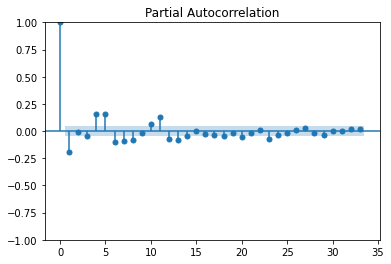

In [ ]:
pacf = plot_pacf(df['Rate differencing'].dropna())

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(train_data['CNY/RUB'], order=(12,1,12))
model_ARIMA_fit = model_ARIMA.fit()
model_ARIMA_fit.summary()

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CNY/RUB   No. Observations:                 1896
Model:               ARIMA(12, 1, 12)   Log Likelihood                1010.098
Date:                Fri, 08 Apr 2022   AIC                          -1970.196
Time:                        14:33:36   BIC                          -1831.522
Sample:                    11-24-2014   HQIC                         -1919.139
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2676      0.743     -0.360      0.719      -1.723       1.188
ar.L2          0.4365      0.683      0.639      0.523      -0.902       1.775
ar.L3          0.4472      0.201      2.225      0.026       0.053       0.841
ar.L4         -0.1787      0.348     -0.513      0.608      -0.861       0.504
ar.L5         -0.1500      0.191     -0.786      0.432      -0.524       0.224
ar.L6          0.0492      0.190      0.259      0.795      -0.323       0.421
ar.L7         -0.2950      0.187     -1.574      0.115      -0.662       0.072
ar.L8         -0.4619      0.228     -2.030      0.042      -0.908      -0.016
ar.L9          0.4274      0.484      0.884      0.377      -0.521       1.376
ar.L10         0.2709      0.205      1.324      0.186      -0.130       0.672
ar.L11        -0.1116      0.246     -0.455      0.649      -0.593       0.370
ar.L12        -0.1839      0.147     -1.249      0.212      -0.473       0.105
ma.L1          0.1469      0.743      0.198      0.843      -1.309       1.603
ma.L2         -0.3811      0.614     -0.621      0.535      -1.584       0.822
ma.L3         -0.3045      0.214     -1.423      0.155      -0.724       0.115
ma.L4          0.1537      0.257      0.598      0.550      -0.350       0.657
ma.L5          0.1002      0.170      0.589      0.556      -0.233       0.434
ma.L6         -0.0101      0.173     -0.058      0.953      -0.349       0.329
ma.L7          0.3464      0.170      2.039      0.041       0.013       0.679
ma.L8          0.3722      0.253      1.473      0.141      -0.123       0.867
ma.L9         -0.3779      0.445     -0.850      0.396      -1.250       0.494
ma.L10        -0.1058      0.188     -0.562      0.574      -0.475       0.263
ma.L11         0.1791      0.184      0.971      0.331      -0.182       0.541
ma.L12         0.1035      0.193      0.537      0.591      -0.274       0.481
sigma2         0.0200      0.000     96.133      0.000       0.020       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):           2623190.30
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             7.68
Prob(H) (two-sided):                  0.30   Kurtosis:                       184.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_data.tail()

CNY/RUB  Predicted_ARIMA  Predicted_SARIMAX  \
Date                                                      
2022-04-04  13.0785        16.840226          17.657215   
2022-04-05  13.2354        16.838960          17.615460   
2022-04-06  13.2027        17.000801          17.693608   
2022-04-07  12.2584        16.922232          17.485465   
2022-04-08  12.4603        16.984701          17.573034   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  Predicted_Prophet  \
Date                                                                         
2022-04-04                16.548108           16.573002          11.914770   
2022-04-05                16.547137           16.573002          11.899825   
2022-04-06                16.546164           16.573002          11.888026   
2022-04-07                16.545191           16.573002          11.874345   
2022-04-08                16.544217           16.573002          11.879162   

            Predicted_DeepAR  
Date                          
2022-04-04         13.865919  
2022-04-05         13.880590  
2022-04-06         13.895211  
2022-04-07         13.929889  
2022-04-08         13.973387

In [ ]:
train_data.tail()

CNY/RUB
Date               
2022-02-22  12.4226
2022-02-23  12.8657
2022-02-24  13.2485
2022-02-25  13.2528
2022-02-28  16.8031

In [ ]:
# prediction 
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-03-01 00:00:00
2022-04-08 00:00:00


In [ ]:
pred=model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals=test_data['CNY/RUB']-pred

In [ ]:
pred

2022-03-01    16.412784
2022-03-02    16.694700
2022-03-03    16.995489
2022-03-04    16.887604
2022-03-07    17.050832
2022-03-08    17.238156
2022-03-09    17.303494
2022-03-10    17.261744
2022-03-11    17.691442
2022-03-14    17.714660
2022-03-15    17.970406
2022-03-16    18.061028
2022-03-17    18.036536
2022-03-18    17.975685
2022-03-21    18.056879
2022-03-22    17.917035
2022-03-23    17.709647
2022-03-24    17.803832
2022-03-25    17.593081
2022-03-28    17.648344
2022-03-29    17.701341
2022-03-30    17.609851
2022-03-31    17.609467
2022-04-01    17.749758
2022-04-04    17.684537
2022-04-05    17.668456
2022-04-06    17.789214
2022-04-07    17.634355
2022-04-08    17.708588
Freq: B, Name: predicted_mean, dtype: float64

In [ ]:
residuals

Date
2022-03-01    1.491116
2022-03-02   -0.785700
2022-03-03    0.309011
2022-03-04    2.498396
2022-03-07    7.469868
2022-03-08    1.910344
2022-03-09    4.296806
2022-03-10    3.850956
2022-03-11    2.731358
2022-03-14    1.184040
2022-03-15   -1.414806
2022-03-16   -2.557928
2022-03-17   -1.852736
2022-03-18   -1.278385
2022-03-21   -1.274079
2022-03-22   -1.272335
2022-03-23   -2.583347
2022-03-24   -1.751332
2022-03-25   -1.576181
2022-03-28   -2.722344
2022-03-29   -4.107241
2022-03-30   -4.460451
2022-03-31   -4.724367
2022-04-01   -4.258758
2022-04-04   -4.606037
2022-04-05   -4.433056
2022-04-06   -4.586514
2022-04-07   -5.375955
2022-04-08   -5.248288
Freq: B, dtype: float64

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

In [ ]:
test_data['Predicted_ARIMA'] = pred

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


In [ ]:
test_data[['CNY/RUB', 'Predicted_ARIMA']].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

### SARIMA Model

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df['Rate monthly differencing'] = df['CNY/RUB'] - df['CNY/RUB'].shift(30) # 


In [ ]:
adf_test(df['Rate monthly differencing'].dropna())

ADF Statistics: -7.54769676479532
p- value: 3.250439489598131e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


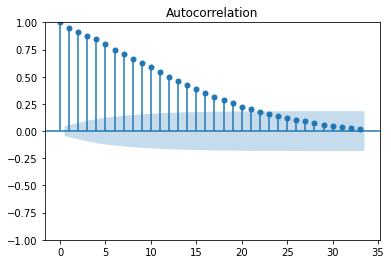

In [ ]:
acf12 = plot_acf(df['Rate monthly differencing'].dropna())
pacf12 = plot_pacf(df['Rate monthly differencing'].dropna())

In [ ]:
model_SARIMAX = SARIMAX(train_data['CNY/RUB'], order=(12,1,20), seasonal_order=(0,0,0,7))
model_SARIMAX_fit = model_SARIMAX.fit()
model_SARIMAX_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.11053D-01    |proj g|=  1.89568D+00


 This problem is unconstrained.



At iterate    5    f= -5.27543D-01    |proj g|=  2.56631D-01

At iterate   10    f= -5.32879D-01    |proj g|=  3.96634D-02

At iterate   15    f= -5.33379D-01    |proj g|=  1.91609D-02

At iterate   20    f= -5.33533D-01    |proj g|=  3.12506D-02

At iterate   25    f= -5.33998D-01    |proj g|=  1.63470D-02

At iterate   30    f= -5.35237D-01    |proj g|=  4.55352D-02

At iterate   35    f= -5.36412D-01    |proj g|=  1.66387D-02

At iterate   40    f= -5.37405D-01    |proj g|=  3.26649D-02

At iterate   45    f= -5.37629D-01    |proj g|=  2.97253D-02


/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -5.38038D-01    |proj g|=  2.82078D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33     50     59      1     0     0   2.821D-02  -5.380D-01
  F = -0.53803835517932364     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CNY/RUB   No. Observations:                 1896
Model:             SARIMAX(12, 1, 20)   Log Likelihood                1020.121
Date:                Fri, 08 Apr 2022   AIC                          -1974.241
Time:                        14:34:01   BIC                          -1791.191
Sample:                    11-24-2014   HQIC                         -1906.846
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2086      0.726     -0.287      0.774      -1.631       1.214
ar.L2          0.1447      0.581      0.249      0.803      -0.994       1.283
ar.L3         -0.0232      0.498     -0.047      0.963      -0.999       0.952
ar.L4         -0.4815      0.441     -1.091      0.275      -1.346       0.383
ar.L5          0.0610      0.470      0.130      0.897      -0.860       0.982
ar.L6          0.1964      0.476      0.412      0.680      -0.737       1.130
ar.L7         -0.3451      0.307     -1.123      0.261      -0.947       0.257
ar.L8         -0.4021      0.373     -1.077      0.281      -1.134       0.330
ar.L9          0.4694      0.251      1.874      0.061      -0.022       0.960
ar.L10         0.2665      0.363      0.734      0.463      -0.445       0.978
ar.L11        -0.0629      0.286     -0.220      0.826      -0.623       0.497
ar.L12        -0.1508      0.289     -0.522      0.602      -0.717       0.415
ma.L1          0.1222      0.726      0.168      0.866      -1.301       1.545
ma.L2         -0.0830      0.618     -0.134      0.893      -1.294       1.128
ma.L3          0.1256      0.554      0.227      0.821      -0.960       1.212
ma.L4          0.4321      0.447      0.966      0.334      -0.445       1.309
ma.L5         -0.0595      0.447     -0.133      0.894      -0.937       0.818
ma.L6         -0.1027      0.452     -0.227      0.820      -0.988       0.783
ma.L7          0.3710      0.326      1.137      0.256      -0.269       1.011
ma.L8          0.3309      0.380      0.872      0.383      -0.413       1.075
ma.L9         -0.3755      0.262     -1.434      0.152      -0.889       0.138
ma.L10        -0.1381      0.300     -0.460      0.645      -0.726       0.450
ma.L11         0.1423      0.274      0.518      0.604      -0.396       0.680
ma.L12         0.1274      0.270      0.471      0.637      -0.402       0.657
ma.L13         0.0532      0.096      0.557      0.578      -0.134       0.240
ma.L14         0.0077      0.116      0.066      0.947      -0.220       0.236
ma.L15         0.0360      0.106      0.340      0.734      -0.172       0.244
ma.L16        -0.0061      0.098     -0.062      0.950      -0.198       0.186
ma.L17        -0.0770      0.094     -0.816      0.414      -0.262       0.108
ma.L18         0.0243      0.071      0.344      0.731      -0.114       0.163
ma.L19        -0.0053      0.077     -0.069      0.945      -0.157       0.146
ma.L20        -0.0842      0.079     -1.069      0.285      -0.239       0.070
sigma2         0.0199      0.000     80.925      0.000       0.019       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):           2731625.07
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             7.75
Prob(H) (two-sided):                  0.14   Kurtosis:       

In [ ]:
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['CNY/RUB'] - pred_SARIMAX

In [ ]:
model_SARIMAX_fit.resid.plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

In [ ]:
model_SARIMAX_fit.resid.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

In [ ]:
test_data['Predicted_SARIMAX'] = pred_SARIMAX

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/1953269687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_SARIMAX


<AxesSubplot:xlabel='Date'>

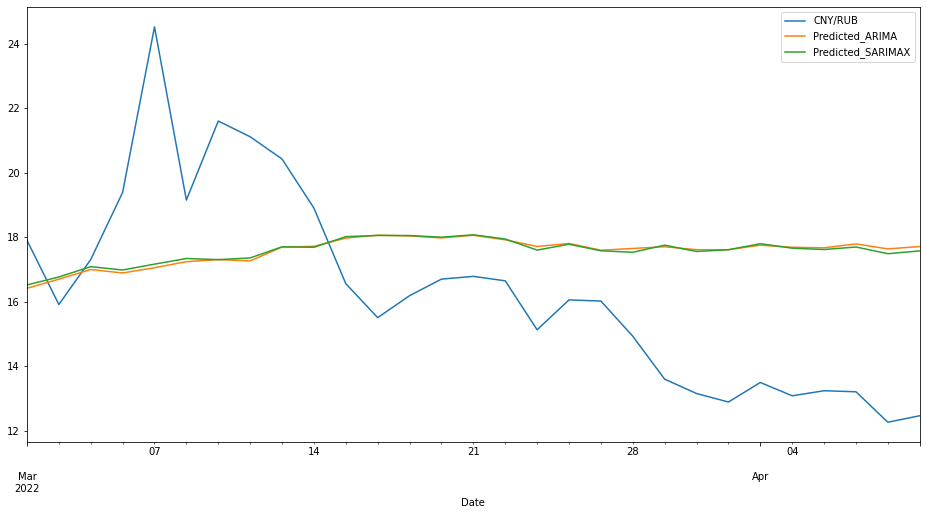

In [ ]:
test_data[['CNY/RUB', 'Predicted_ARIMA', 'Predicted_SARIMAX']].plot(figsize=(16,8))

### Orbit - Damped Local Trend (DLP) model

In [ ]:
!pip install orbit
!pip install orbit-ml

In [ ]:
import orbit
from orbit.models.dlt import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

In [ ]:
train_df = train_data[['CNY/RUB']].reset_index()
test_df = test_data[['CNY/RUB']].reset_index()

In [ ]:
date_col = 'Date'
response_col = 'CNY/RUB'

In [ ]:
train_df.head()

Date  CNY/RUB
0 2014-11-24   7.3130
1 2014-11-25   7.5435
2 2014-11-26   7.6650
3 2014-11-27   7.9798
4 2014-11-28   8.1798

In [ ]:
# Define the DLT model
def createDLT(global_trend_option): 
  return DLT(
      response_col=response_col,
      date_col=date_col,
      seasonality=-1,
      estimator='stan-map',
      seed=8888,
      global_trend_option=global_trend_option, # linear, loglinear, flat, or logistic, 
      # for predicting uncertainty
      n_bootstrap_draws=1000,
  )

In [ ]:
dlt_loglinear = createDLT('loglinear')
dlt_loglinear.fit(df=train_df)
predicted_df = dlt_loglinear.predict(df=test_df)

Initial log joint probability = -733.48
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       1690.07       1.48212       4.13809           1           1       23   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      28       1691.57     0.0135661    0.00775804           1           1       37   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [ ]:
predicted_df.head()

Date  prediction_5  prediction  prediction_95
0 2022-03-01     16.427182   16.571144      16.735139
1 2022-03-02     16.358991   16.570195      16.805124
2 2022-03-03     16.304298   16.569245      16.835317
3 2022-03-04     16.272815   16.568294      16.859890
4 2022-03-07     16.249621   16.567342      16.887839

In [ ]:
prediction = predicted_df[['Date', 'prediction']].set_index('Date')
prediction.head()

prediction
Date                  
2022-03-01   16.571144
2022-03-02   16.570195
2022-03-03   16.569245
2022-03-04   16.568294
2022-03-07   16.567342

In [ ]:
test_data['Predicted_DLT_LogLinear'] = prediction

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/540110592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DLT_LogLinear'] = prediction


In [ ]:
dlt_flat = createDLT('flat')
dlt_flat.fit(df=train_df)
predicted_df = dlt_flat.predict(df=test_df)

Initial log joint probability = -734.7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       1687.81     0.0800065      0.866502      0.6282      0.6282       25   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39       1688.16      0.701039      0.107548           1           1       45   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      43       1688.16      0.887571     0.0293196           1           1       49   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [ ]:
prediction = predicted_df[['Date', 'prediction']].set_index('Date')
prediction.head()

prediction
Date                  
2022-03-01   16.573001
2022-03-02   16.573001
2022-03-03   16.573001
2022-03-04   16.573001
2022-03-07   16.573001

In [ ]:
test_data['Predicted_DLT_Flat'] = prediction

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/2472618137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DLT_Flat'] = prediction


In [ ]:
test_data.head()

CNY/RUB  Predicted_ARIMA  Predicted_SARIMAX  \
Date                                                      
2022-03-01  17.9039        16.412784          16.516389   
2022-03-02  15.9090        16.694700          16.763049   
2022-03-03  17.3045        16.995489          17.083908   
2022-03-04  19.3860        16.887604          16.979610   
2022-03-07  24.5207        17.050832          17.162043   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  Predicted_Prophet  \
Date                                                                         
2022-03-01                16.571144           16.573001          11.995671   
2022-03-02                16.570195           16.573001          11.991966   
2022-03-03                16.569245           16.573001          11.986155   
2022-03-04                16.568294           16.573001          11.998535   
2022-03-07                16.567342           16.573001          12.010328   

            Predicted_DeepAR  
Date                          
2022-03-01         12.725201  
2022-03-02         12.786464  
2022-03-03         12.923466  
2022-03-04         12.981483  
2022-03-07         13.089525

<AxesSubplot:xlabel='Date'>

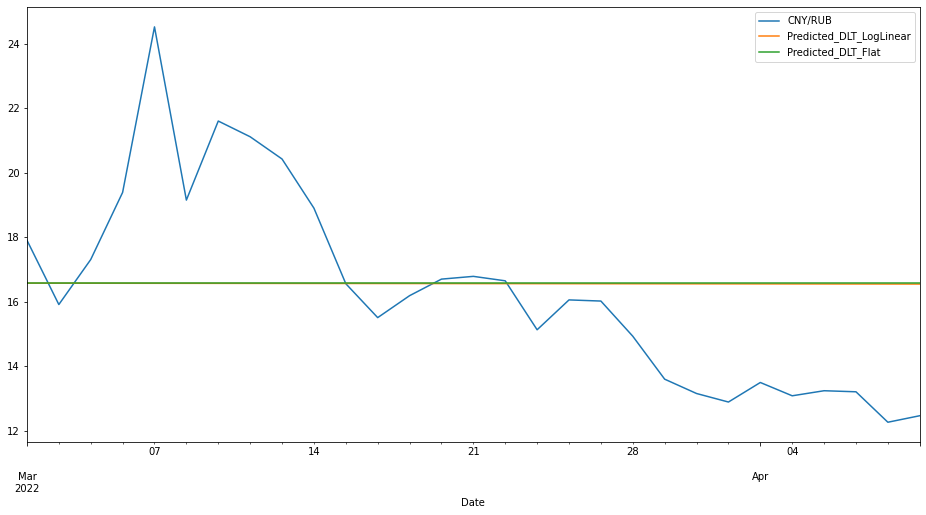

In [ ]:
test_data[['CNY/RUB', 'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat']].plot(figsize=(16,8))

### Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
train_df.columns

Index(['Date', 'CNY/RUB'], dtype='object')

In [ ]:
proph_train = train_df.rename(columns={'Date':'ds', 'CNY/RUB': 'y'})
proph_test = test_df.rename(columns={'Date':'ds', 'CNY/RUB': 'y'})

In [ ]:
proph_train.shape, proph_test.shape, train_df.shape, test_df.shape

((1896, 2), (29, 2), (1896, 2), (29, 2))

In [ ]:
m = Prophet()
m.fit(proph_train)
future = m.make_future_dataframe(periods=len(proph_test), freq='B')
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.3022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5679.66     0.0234998       4078.71           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5908.26    0.00912951       579.816           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5956.76     0.0016285        1298.3      0.6626      0.6626      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5995.18     0.0170437       513.647           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6022.18     0.0140855       1489.27           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2014-11-24  8.985208    8.808855    9.746790     8.985208     8.985208   
1 2014-11-25  8.987028    8.787545    9.670827     8.987028     8.987028   
2 2014-11-26  8.988848    8.787421    9.703109     8.988848     8.988848   
3 2014-11-27  8.990668    8.792175    9.712097     8.990668     8.990668   
4 2014-11-28  8.992488    8.737848    9.667940     8.992488     8.992488   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.272974              0.272974              0.272974  0.362859   
1        0.259680              0.259680              0.259680  0.354091   
2        0.250703              0.250703              0.250703  0.348577   
3        0.241048              0.241048              0.241048  0.341248   
4        0.251096              0.251096              0.251096  0.352438   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.362859      0.362859 -0.089885     -0.089885     -0.089885   
1      0.354091      0.354091 -0.094410     -0.094410     -0.094410   
2      0.348577      0.348577 -0.097874     -0.097874     -0.097874   
3      0.341248      0.341248 -0.100199     -0.100199     -0.100199   
4      0.352438      0.352438 -0.101342     -0.101342     -0.101342   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  9.258181  
1                         0.0  9.246708  
2                         0.0  9.239551  
3                         0.0  9.231717  
4                         0.0  9.243584

In [ ]:
forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1920 2022-04-04  11.439091   11.470748   12.388189    11.425512    11.461334   
1921 2022-04-05  11.440206   11.444312   12.362306    11.424708    11.464363   
1922 2022-04-06  11.441320   11.421730   12.369626    11.424528    11.466655   
1923 2022-04-07  11.442435   11.424764   12.351025    11.423998    11.469456   
1924 2022-04-08  11.443550   11.424648   12.343906    11.423877    11.472644   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1920        0.475679              0.475679              0.475679  0.362859   
1921        0.459619              0.459619              0.459619  0.354091   
1922        0.446706              0.446706              0.446706  0.348577   
1923        0.431910              0.431910              0.431910  0.341248   
1924        0.435613              0.435613              0.435613  0.352438   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1920      0.362859      0.362859  0.112820      0.112820      0.112820   
1921      0.354091      0.354091  0.105528      0.105528      0.105528   
1922      0.348577      0.348577  0.098128      0.098128      0.098128   
1923      0.341248      0.341248  0.090662      0.090662      0.090662   
1924      0.352438      0.352438  0.083175      0.083175      0.083175   

      multiplicative_terms  multiplicative_terms_lower  \
1920                   0.0                         0.0   
1921                   0.0                         0.0   
1922                   0.0                         0.0   
1923                   0.0                         0.0   
1924                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1920                         0.0  11.914770  
1921                         0.0  11.899825  
1922                         0.0  11.888026  
1923                         0.0  11.874345  
1924                         0.0  11.879162

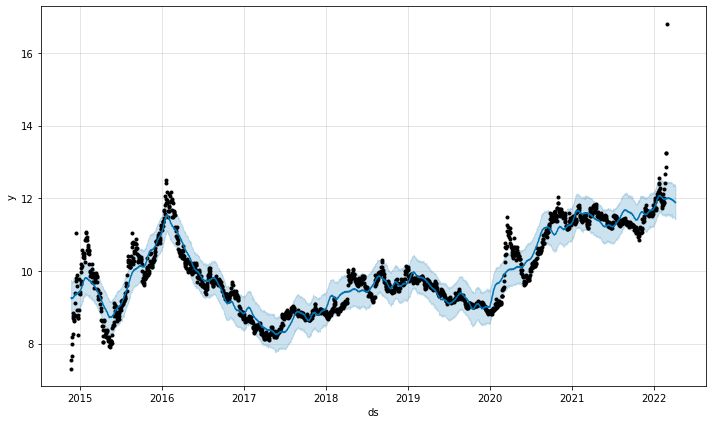

In [ ]:
fig1 = m.plot(forecast)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


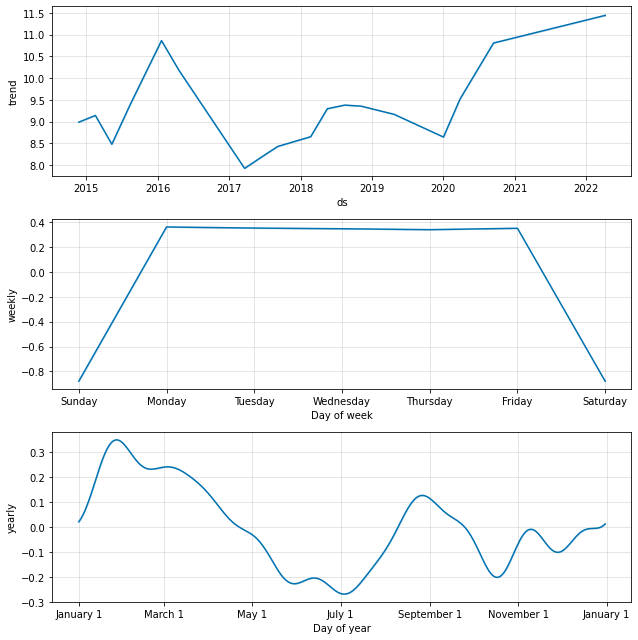

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-29:][['ds', 'yhat']].set_index('ds')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/2546728286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Prophet'] = forecast[-29:][['ds', 'yhat']].set_index('ds')


In [ ]:
test_data.head()

CNY/RUB  Predicted_ARIMA  Predicted_SARIMAX  \
Date                                                      
2022-03-01  17.9039        16.412784          16.516389   
2022-03-02  15.9090        16.694700          16.763049   
2022-03-03  17.3045        16.995489          17.083908   
2022-03-04  19.3860        16.887604          16.979610   
2022-03-07  24.5207        17.050832          17.162043   

            Predicted_DLT_LogLinear  Predicted_DLT_Flat  Predicted_Prophet  \
Date                                                                         
2022-03-01                16.571144           16.573001          11.995671   
2022-03-02                16.570195           16.573001          11.991966   
2022-03-03                16.569245           16.573001          11.986155   
2022-03-04                16.568294           16.573001          11.998535   
2022-03-07                16.567342           16.573001          12.010328   

            Predicted_DeepAR  
Date                          
2022-03-01         12.725201  
2022-03-02         12.786464  
2022-03-03         12.923466  
2022-03-04         12.981483  
2022-03-07         13.089525

<AxesSubplot:xlabel='Date'>

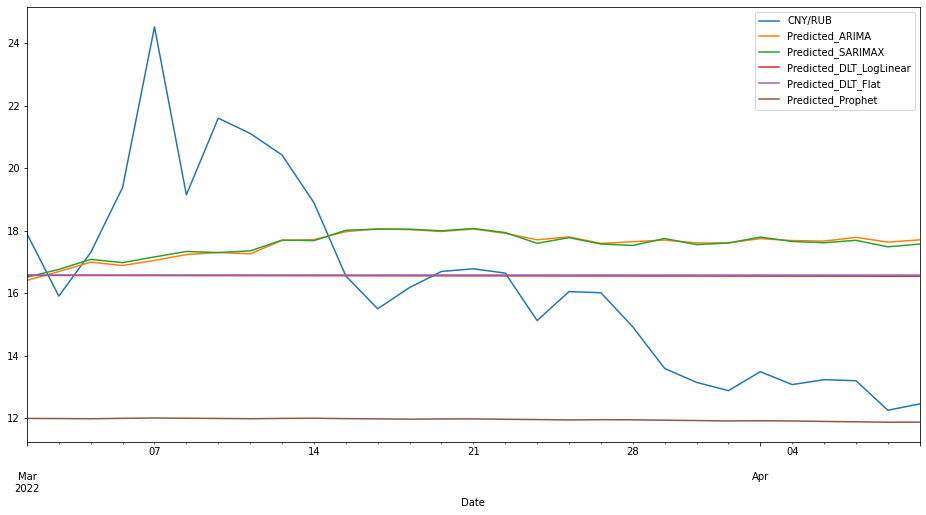

In [ ]:
test_data[['CNY/RUB', 'Predicted_ARIMA', 'Predicted_SARIMAX', 
           'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet']].plot(figsize=(16,8))

### DeepAR

In [ ]:
df.shape

(1925, 4)

In [ ]:
df.tail()

CNY/RUB  Rate differencing  Rate second differencing  \
Date                                                               
2022-04-04  13.0785            -0.4125                   -1.0184   
2022-04-05  13.2354             0.1569                    0.5694   
2022-04-06  13.2027            -0.0327                   -0.1896   
2022-04-07  12.2584            -0.9443                   -0.9116   
2022-04-08  12.4603             0.2019                    1.1462   

            Rate monthly differencing  
Date                                   
2022-04-04                     0.4192  
2022-04-05                     0.8128  
2022-04-06                     0.3370  
2022-04-07                    -0.9901  
2022-04-08                    -0.7925

In [ ]:
df.head()

CNY/RUB  Rate differencing  Rate second differencing  \
Date                                                               
2014-11-24   7.3130                NaN                       NaN   
2014-11-25   7.5435             0.2305                       NaN   
2014-11-26   7.6650             0.1215                   -0.1090   
2014-11-27   7.9798             0.3148                    0.1933   
2014-11-28   8.1798             0.2000                   -0.1148   

            Rate monthly differencing  
Date                                   
2014-11-24                        NaN  
2014-11-25                        NaN  
2014-11-26                        NaN  
2014-11-27                        NaN  
2014-11-28                        NaN

In [ ]:
train_data.head()

CNY/RUB
Date               
2014-11-24   7.3130
2014-11-25   7.5435
2014-11-26   7.6650
2014-11-27   7.9798
2014-11-28   8.1798

In [ ]:
start = pd.Timestamp("2022-03-01", freq='B')
train_ds = ListDataset([{'target': train_data['CNY/RUB'], 'start': start}], freq='B')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/3781945567.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start = pd.Timestamp("2022-03-01", freq='B')


Test dataset: use the whole dataset, add 'target' and 'start' field

In [ ]:
test_ds = ListDataset([{'target': df['CNY/RUB'], 'start': start}], freq='B')

In [ ]:
np.random.seed(42)
mx.random.seed(42)

estimator = DeepAREstimator(
    prediction_length=29,
    context_length=30,
    freq='B',
    trainer=Trainer( # ctx="gpu",
                    epochs=25, learning_rate=1e-3, num_batches_per_epoch=100)
)
predictor = estimator.train(train_ds)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:384: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  ..., i0 : i0 + length * start.freq.n : start.freq.n
INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.001
  0%|                                                                                              | 0/100 [00:00<?, ?it/s]/Users/wismineffendi/opt/anaconda3/envs/time

In [ ]:
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:384: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  ..., i0 : i0 + length * start.freq.n : start.freq.n
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)


In [ ]:
pred_df = pd.DataFrame(predictions)
pred_df.columns = ['Pred_CNY/RUB']
pred_df

Pred_CNY/RUB
0      12.725201
1      12.786464
2      12.923466
3      12.981483
4      13.089525
5      13.149729
6      13.214755
7      13.291990
8      13.344567
9      13.440859
10     13.536672
11     13.509921
12     13.555861
13     13.546738
14     13.584393
15     13.626820
16     13.642005
17     13.634327
18     13.649724
19     13.700718
20     13.705311
21     13.755175
22     13.791914
23     13.836241
24     13.865919
25     13.880590
26     13.895211
27     13.929889
28     13.973387

In [ ]:
test_data['Predicted_DeepAR'] = pd.concat([test_df.Date, pred_df], axis=1).set_index('Date')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_2029/3866931146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DeepAR'] = pd.concat([test_df.Date, pred_df], axis=1).set_index('Date')


<AxesSubplot:xlabel='Date'>

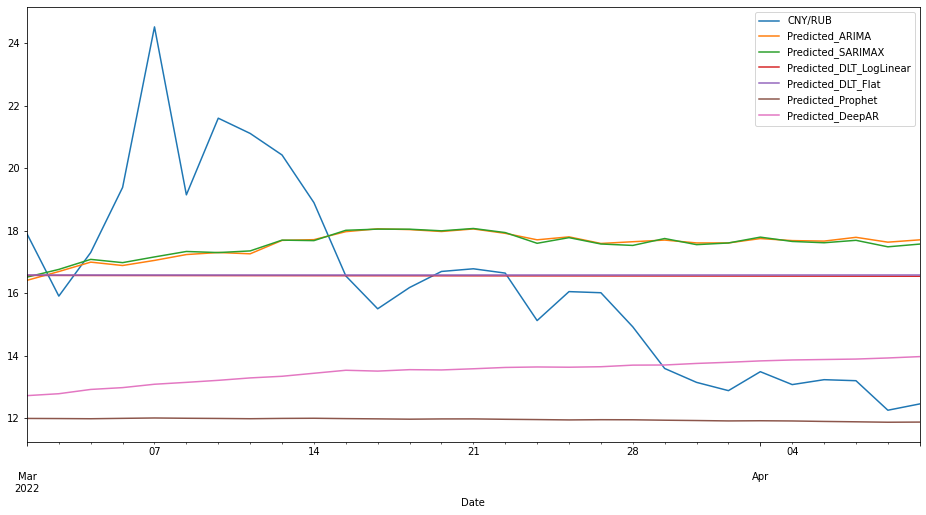

In [ ]:
test_data[['CNY/RUB', 'Predicted_ARIMA', 'Predicted_SARIMAX', 'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet', 'Predicted_DeepAR']].plot(figsize=(16,8))

### Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 11.822140491046158
Mean Absolute Error is : 2.986611555321712
Root Mean Square Error is : 3.438333970260329
Mean Absolute Percentage Error is : 19.427583331684716
R2 score is : -0.29001325084404095



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 11.523053566497037
Mean Absolute Error is : 2.9494328010883746
Root Mean Square Error is : 3.394562352718983
Mean Absolute Percentage Error is : 19.18924154315152
R2 score is : -0.257377359220627



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_DLT_LogLinear)

Evaluation metric results:-
Mean Square Error is : 9.169527369683191
Mean Absolute Error is : 2.3939916497875373
Root Mean Square Error is : 3.028122746799276
Mean Absolute Percentage Error is : 14.982253396529071
R2 score is : -0.000564307269679043



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_DLT_Flat)

Evaluation metric results:-
Mean Square Error is : 9.215620371329845
Mean Absolute Error is : 2.4020624386491094
Root Mean Square Error is : 3.035724027531133
Mean Absolute Percentage Error is : 15.047351015908534
R2 score is : -0.005593902624293046



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 28.21277047135983
Mean Absolute Error is : 4.387438954255701
Root Mean Square Error is : 5.311569492283785
Mean Absolute Percentage Error is : 24.505463918476835
R2 score is : -2.0785328408709374



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_DeepAR)

Evaluation metric results:-
Mean Square Error is : 18.866878887918894
Mean Absolute Error is : 3.3461937783076845
Root Mean Square Error is : 4.343602063716115
Mean Absolute Percentage Error is : 18.36028466163782
R2 score is : -1.0587239498565046



### Conclusion:

Based on the MSE and MAE values, the Orbit DLP loglinear model provide the best prediction. But the R2 score for all predictions are negative so the predictions are not so reliable. 

## Remarks:

This exchange rate from China Yuan to Russia Ruble experiencing high volatility due to the war, thus no model would be able to give accurate prediction.
